# TrainModel with CoquiTTS

## Install dependeces

In [ ]:
!pip install -U pip -q
!pip install TTS -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 26.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.5/73.5 kB 6.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.7/3.7 MB 104.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.6/101.6 kB 11.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.3/15.3 MB 112.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.1/18.1 MB 107.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 31.4/31.4 MB 27.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.9/10.9 MB 118.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (s

## Normalize audios

In [ ]:
!unzip wavs.zip

Archive:  wavs.zip
   creating: wavs/
  inflating: wavs/wav1.wav           
  inflating: wavs/wav10.wav          
  inflating: wavs/wav11.wav          
  inflating: wavs/wav12.wav          
  inflating: wavs/wav13.wav          
  inflating: wavs/wav14.wav          
  inflating: wavs/wav15.wav          
  inflating: wavs/wav16.wav          
  inflating: wavs/wav17.wav          
  inflating: wavs/wav18.wav          
  inflating: wavs/wav19.wav          
  inflating: wavs/wav2.wav           
  inflating: wavs/wav20.wav          
  inflating: wavs/wav21.wav          
  inflating: wavs/wav22.wav          
  inflating: wavs/wav23.wav          
  inflating: wavs/wav24.wav          
  inflating: wavs/wav25.wav          
  inflating: wavs/wav26.wav          
  inflating: wavs/wav27.wav          
  inflating: wavs/wav28.wav          
  inflating: wavs/wav29.wav          
  inflating: wavs/wav3.wav           
  inflating: wavs/wav30.wav          
  inflating: wavs/wav31.wav          
  inflating:

### Mount drive

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

ValueError: mount failed

### Normalize audios

In [ ]:
## Normalizacion de audios

import librosa
import soundfile as sf
from pathlib import Path

def normalize_audio(audio_path, output_path):
    # Cargar el audio con librosa
    data, rate = librosa.load(audio_path, sr=None)  # sr=None para mantener la tasa de muestreo original
    # Normaliza la señal de audio a -1.0 a 1.0
    max_amplitude = max(abs(data.min()), data.max())
    normalized_data = data / max_amplitude
    # Guardar el audio normalizado
    sf.write(output_path, normalized_data, rate)

# Carpeta donde están los archivos de audio
audio_folder = Path('/content/wavs')
for audio_file in audio_folder.glob('*.wav'):
    normalize_audio(audio_file, audio_file)  # Guarda el archivo normalizado en la misma ubicación


### Test normalize audios

Original Audio:


<ipython-input-4-836999f69a4c>:7: UserWarning: PySoundFile failed. Trying audioread instead.
  data, rate = librosa.load(audio_path, sr=None)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


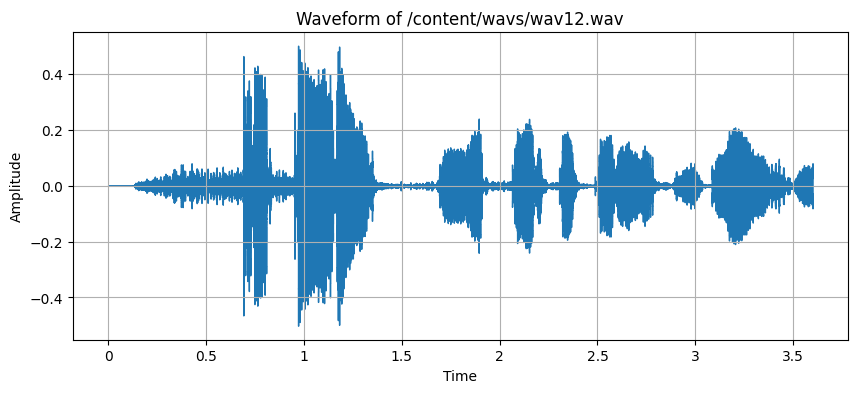

Max amplitude: 0.50115966796875
Min amplitude: -0.4610595703125
Normalized Audio:


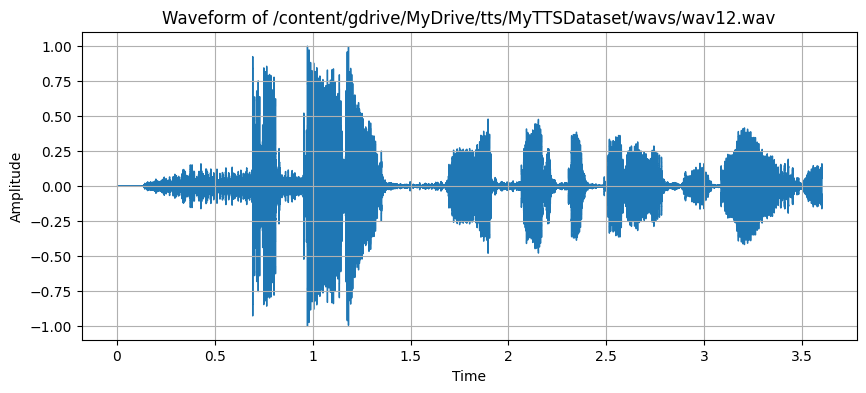

Max amplitude: 0.999969482421875
Min amplitude: -0.920013427734375


In [ ]:
## Comparacion de normalizacion de audio

import librosa
import matplotlib.pyplot as plt

def plot_audio(audio_path):
    data, rate = librosa.load(audio_path, sr=None)
    plt.figure(figsize=(10, 4))
    librosa.display.waveshow(data, sr=rate)
    plt.title(f'Waveform of {audio_path}')
    plt.xlabel('Time')
    plt.ylabel('Amplitude')
    plt.grid(True)
    plt.show()

    print(f"Max amplitude: {max(data)}")
    print(f"Min amplitude: {min(data)}")

# Cargar y graficar el audio original
print("Original Audio:")
plot_audio('/content/wavs/wav12.wav')  # Cambia esto al path del audio original

# Cargar y graficar el audio normalizado
print("Normalized Audio:")
plot_audio('/content/gdrive/MyDrive/tts/MyTTSDataset/wavs/wav12.wav')  # Cambia esto al path del audio normalizado


#### Convert folder to zip

In [ ]:
!zip -r archivo.zip /content/wavs

  adding: content/wavs/ (stored 0%)
  adding: content/wavs/wav32.wav (deflated 22%)
  adding: content/wavs/wav18.wav (deflated 18%)
  adding: content/wavs/wav1.wav (deflated 15%)
  adding: content/wavs/wav28.wav (deflated 17%)
  adding: content/wavs/wav37.wav (deflated 13%)
  adding: content/wavs/wav35.wav (deflated 16%)
  adding: content/wavs/wav47.wav (deflated 13%)
  adding: content/wavs/wav10.wav (deflated 22%)
  adding: content/wavs/wav5.wav (deflated 18%)
  adding: content/wavs/wav7.wav (deflated 21%)
  adding: content/wavs/wav17.wav (deflated 15%)
  adding: content/wavs/wav34.wav (deflated 15%)
  adding: content/wavs/wav3.wav (deflated 18%)
  adding: content/wavs/wav42.wav (deflated 20%)
  adding: content/wavs/wav50.wav (deflated 18%)
  adding: content/wavs/wav8.wav (deflated 20%)
  adding: content/wavs/wav40.wav (deflated 15%)
  adding: content/wavs/wav36.wav (deflated 20%)
  adding: content/wavs/wav45.wav (deflated 23%)
  adding: content/wavs/wav31.wav (deflated 17%)
  adding:

### Import dependencies

In [ ]:
import os

from trainer import Trainer, TrainerArgs

from TTS.tts.configs.shared_configs import BaseDatasetConfig, CharactersConfig
from TTS.tts.configs.vits_config import VitsConfig
from TTS.tts.datasets import load_tts_samples
from TTS.tts.models.vits import Vits, VitsArgs, VitsAudioConfig
from TTS.tts.utils.speakers import SpeakerManager
from TTS.tts.utils.text.tokenizer import TTSTokenizer
from TTS.utils.audio import AudioProcessor

### Create directory in drive
- tts
  - MyTTSDataset
    - transcript.txt
    - wavs/
      - wavX.wav


In [ ]:
# Configuración del dataset
output_path = "/content/gdrive/MyDrive/tts"


dataset_config = BaseDatasetConfig(
    formatter="ljspeech", meta_file_train="transcript.txt", path=os.path.join(output_path, "MyTTSDataset/")
)

In [ ]:
# Configuración del audio
audio_config = VitsAudioConfig(
    sample_rate=44100, win_length=1024, hop_length=256, num_mels=80, mel_fmin=0, mel_fmax=None
)

In [ ]:
# Configuracion de carecteres en el idioma

character_config = CharactersConfig(
    characters_class= "TTS.tts.models.vits.VitsCharacters",
    characters= "ABCDEFGHIJKLMNOPQRSTUVWXYZabcdefghijklmnñopqrstuvwxyz1234567890aáóéí",
    punctuations=" !,.?-´",
    pad= "<PAD>",
    eos= "<EOS>",
    bos= "<BOS>",
    blank= "<BLNK>",
)

In [ ]:
config = VitsConfig(
    audio=audio_config,
    characters=character_config,
    run_name="vits_vctk",
    batch_size=16,
    eval_batch_size=4,
    num_loader_workers=4,
    num_eval_loader_workers=4,
    run_eval=True,
    test_delay_epochs=0,
    epochs=200,
    text_cleaner="basic_cleaners",
    use_phonemes=False,
    phoneme_language="es-mx",
    phoneme_cache_path=os.path.join(output_path, "phoneme_cache"),
    compute_input_seq_cache=True,
    print_step=25,
    print_eval=False,
    save_best_after=1000,
    save_checkpoints=True,
    save_all_best=True,
    mixed_precision=True,
    max_text_len=250,  # change this if you have a larger VRAM than 16GB
    output_path=output_path,
    datasets=[dataset_config],
    cudnn_benchmark=False,
    test_sentences=[
        ["La rana que estava sentada cantando debajo del agua"],
        ["La verdad ayer estuve comiendo mucho."],
        ["¿Hola qe tal?"]
    ]
)


In [ ]:
# Audio processor is used for feature extraction and audio I/O.
# It mainly serves to the dataloader and the training loggers.
ap = AudioProcessor.init_from_config(config)

# INITIALIZE THE TOKENIZER
# Tokenizer is used to convert text to sequences of token IDs.
# config is updated with the default characters if not defined in the config.
tokenizer, config = TTSTokenizer.init_from_config(config)

 > Setting up Audio Processor...
 | > sample_rate:44100
 | > resample:False
 | > num_mels:80
 | > log_func:np.log10
 | > min_level_db:0
 | > frame_shift_ms:None
 | > frame_length_ms:None
 | > ref_level_db:None
 | > fft_size:1024
 | > power:None
 | > preemphasis:0.0
 | > griffin_lim_iters:None
 | > signal_norm:None
 | > symmetric_norm:None
 | > mel_fmin:0
 | > mel_fmax:None
 | > pitch_fmin:None
 | > pitch_fmax:None
 | > spec_gain:20.0
 | > stft_pad_mode:reflect
 | > max_norm:1.0
 | > clip_norm:True
 | > do_trim_silence:False
 | > trim_db:60
 | > do_sound_norm:False
 | > do_amp_to_db_linear:True
 | > do_amp_to_db_mel:True
 | > do_rms_norm:False
 | > db_level:None
 | > stats_path:None
 | > base:10
 | > hop_length:256
 | > win_length:1024


In [ ]:
def formatter(root_path, manifest_file, **kwargs):  # pylint: disable=unused-argument
    """Assumes each line as ```<filename>|<transcription>```
    """
    txt_file = os.path.join(root_path, manifest_file)
    items = []
    speaker_name = "my_speaker"
    with open(txt_file, "r", encoding="utf-8") as ttf:
        for line in ttf:
            wav = line.split("|")
            wav_file = f"/content/gdrive/MyDrive/tts/MyTTSDataset/wavs/{wav[0]}.wav"
            text = wav[1]
            # print(text)
            items.append({"text":text, "audio_file":wav_file, "speaker_name":speaker_name, "root_path": root_path})
    return items

In [ ]:
# Cargar muestras del dataset

train_samples, eval_samples = load_tts_samples(
dataset_config,
eval_split=True,
formatter=formatter,
#eval_split_size=0.02 # Set a smaller evaluation split size
)

 | > Found 199 files in /content/gdrive/MyDrive/tts/MyTTSDataset


In [ ]:
# Inicializar el modelo y el entrenador
# init model
model = Vits(config, ap, tokenizer, speaker_manager=None)

# init the trainer and 🚀
trainer = Trainer(
    TrainerArgs(),
    config,
    output_path,
    model=model,
    train_samples=train_samples,
    eval_samples=eval_samples,
)

 > Training Environment:
 | > Backend: Torch
 | > Mixed precision: True
 | > Precision: fp16
 | > Current device: 0
 | > Num. of GPUs: 1
 | > Num. of CPUs: 12
 | > Num. of Torch Threads: 6
 | > Torch seed: 54321
 | > Torch CUDNN: True
 | > Torch CUDNN deterministic: False
 | > Torch CUDNN benchmark: False
 | > Torch TF32 MatMul: False
 > Start Tensorboard: tensorboard --logdir=/content/gdrive/MyDrive/tts/vits_vctk-July-16-2024_07+17PM-0000000

 > Model has 83048812 parameters


In [ ]:
trainer.fit()


 > EPOCH: 0/200
 --> /content/gdrive/MyDrive/tts/vits_vctk-July-16-2024_07+17PM-0000000

 > TRAINING (2024-07-16 19:18:04) 




> DataLoader initialization
| > Tokenizer:
	| > add_blank: True
	| > use_eos_bos: False
	| > use_phonemes: False
| > Number of instances : 198
 | > Preprocessing samples
 | > Max text length: 232
 | > Min text length: 21
 | > Avg text length: 173.41919191919192
 | 
 | > Max audio length: 529222.0
 | > Min audio length: 460952.0
 | > Avg audio length: 485095.5252525252
 | > Num. instances discarded samples: 0
 | > Batch group size: 0.


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


de una forma que da buenos resultados con recurrent neural networks. es donde importa el orden de los factores, ¿sale? pero también hay algunos, alguna parte,
 [!] Character '¿' not found in the vocabulary. Discarding it.
en matrices que representen un tipo de imagen. pero para texto hay otras técnicas, ¿vale? por ejemplo, esta es muy buena para texto.en matrices que representen un tipo de imagen. pero para texto hay otras técnicas, ¿vale? por ejemplo, esta es muy buena para texto.en matrices que representen un tipo de imagen. pero para texto hay otras técnicas, ¿vale? por ejemplo, esta es muy buena para texto.


 [!] Character '¿' not found in the vocabulary. Discarding it. [!] Character '¿' not found in the vocabulary. Discarding it. [!] Character '¿' not found in the vocabulary. Discarding it.


valores como el accuracy, el f1 score. hay varios que son para clasificación. si quieres hacer regresión, al fin del día regresar números, no categorías, entonces requieres como ccc, por eje

 ! Run is removed from /content/gdrive/MyDrive/tts/vits_vctk-July-16-2024_07+17PM-0000000


Internal Python error in the inspect module.
Below is the traceback from this internal error.

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/trainer/trainer.py", line 1833, in fit
    self._fit()
  File "/usr/local/lib/python3.10/dist-packages/trainer/trainer.py", line 1785, in _fit
    self.train_epoch()
  File "/usr/local/lib/python3.10/dist-packages/trainer/trainer.py", line 1503, in train_epoch
    for cur_step, batch in enumerate(self.train_loader):
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py", line 631, in __next__
    data = self._next_data()
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py", line 1346, in _next_data
    return self._process_data(data)
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py", line 1372, in _process_data
    data.reraise()
  File "/usr/local/lib/python3.10/dist-packages/torch/_utils.py", line 705, in reraise
    raise excep

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/trainer/trainer.py", line 1833, in fit
    self._fit()
  File "/usr/local/lib/python3.10/dist-packages/trainer/trainer.py", line 1785, in _fit
    self.train_epoch()
  File "/usr/local/lib/python3.10/dist-packages/trainer/trainer.py", line 1503, in train_epoch
    for cur_step, batch in enumerate(self.train_loader):
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py", line 631, in __next__
    data = self._next_data()
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py", line 1346, in _next_data
    return self._process_data(data)
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py", line 1372, in _process_data
    data.reraise()
  File "/usr/local/lib/python3.10/dist-packages/torch/_utils.py", line 705, in reraise
    raise exception
IndexError: Caught IndexError in DataLoader worker process 0.
Original Traceback (most rec

TypeError: object of type 'NoneType' has no len()

## Load model CoquiTTS (pth)

In [ ]:
from TTS.api import TTS

In [ ]:
# Rutas a los archivos del modelo y configuración
model_path = "/content/gdrive/MyDrive/tts/vits_vctk-June-25-2024_05+42PM-0000000/checkpoint_152.pth"
config_path = "/content/gdrive/MyDrive/tts/vits_vctk-June-25-2024_05+42PM-0000000/config.json"

# Cargar el modelo
tts = TTS(model_path=model_path, config_path=config_path)

# Texto a sintetizar
texto = "Hola, este es un ejemplo de síntesis de voz."

# Generar el archivo de audio
tts.tts_to_file(text=texto, file_path="salida.wav")

 > Using model: vits
 > Setting up Audio Processor...
 | > sample_rate:44100
 | > resample:False
 | > num_mels:80
 | > log_func:np.log10
 | > min_level_db:0
 | > frame_shift_ms:None
 | > frame_length_ms:None
 | > ref_level_db:None
 | > fft_size:1024
 | > power:None
 | > preemphasis:0.0
 | > griffin_lim_iters:None
 | > signal_norm:None
 | > symmetric_norm:None
 | > mel_fmin:0
 | > mel_fmax:None
 | > pitch_fmin:None
 | > pitch_fmax:None
 | > spec_gain:20.0
 | > stft_pad_mode:reflect
 | > max_norm:1.0
 | > clip_norm:True
 | > do_trim_silence:False
 | > trim_db:60
 | > do_sound_norm:False
 | > do_amp_to_db_linear:True
 | > do_amp_to_db_mel:True
 | > do_rms_norm:False
 | > db_level:None
 | > stats_path:None
 | > base:10
 | > hop_length:256
 | > win_length:1024


RuntimeError: PytorchStreamReader failed locating file data/93: file not found

In [ ]:
from TTS.api import TTS

from TTS.tts.configs.vits_config import VitsConfig
from TTS.tts.models.vits import Vits
from TTS.config import load_config
from TTS.utils.synthesizer import Synthesizer

config = VitsConfig()
model = Vits(config)

config = load_config("/content/gdrive/MyDrive/tts/vits_vctk-June-25-2024_05+42PM-0000000/config.json")
model = Vits.init_from_config(config)
model.load_checkpoint(config, '/content/gdrive/MyDrive/tts/vits_vctk-June-25-2024_05+42PM-0000000/checkpoint_152.pth', eval=True)

speakers_file_path = None
language_ids_file_path = None
vocoder_path = None
vocoder_config_path = None
encoder_path = None
encoder_config_path = None
cuda = True

synthesizer = Synthesizer("/content/gdrive/MyDrive/tts/vits_vctk-June-25-2024_05+42PM-0000000/checkpoint_152.pth", "/content/gdrive/MyDrive/tts/vits_vctk-June-25-2024_05+42PM-0000000/config.json", speakers_file_path, language_ids_file_path, vocoder_path, vocoder_config_path, encoder_path, encoder_config_path, cuda)

speaker_idx = None
language_idx = None
speaker_wav = None
reference_wav = None
style_wav = None
style_text = None
reference_speaker_name = None
wav = synthesizer.tts(
	"Hola que tal?, esta es una prueba de audio.",
	speaker_idx,
	language_idx,
	speaker_wav,
	reference_wav,
	style_wav,
	style_text,
	reference_speaker_name
)
synthesizer.save_wav(wav, "output.wav")

 > Setting up Audio Processor...
 | > sample_rate:44100
 | > resample:False
 | > num_mels:80
 | > log_func:np.log10
 | > min_level_db:0
 | > frame_shift_ms:None
 | > frame_length_ms:None
 | > ref_level_db:None
 | > fft_size:1024
 | > power:None
 | > preemphasis:0.0
 | > griffin_lim_iters:None
 | > signal_norm:None
 | > symmetric_norm:None
 | > mel_fmin:0
 | > mel_fmax:None
 | > pitch_fmin:None
 | > pitch_fmax:None
 | > spec_gain:20.0
 | > stft_pad_mode:reflect
 | > max_norm:1.0
 | > clip_norm:True
 | > do_trim_silence:False
 | > trim_db:60
 | > do_sound_norm:False
 | > do_amp_to_db_linear:True
 | > do_amp_to_db_mel:True
 | > do_rms_norm:False
 | > db_level:None
 | > stats_path:None
 | > base:10
 | > hop_length:256
 | > win_length:1024


RuntimeError: PytorchStreamReader failed locating file data/93: file not found